# Decision Tree & Random Forest Regression Solution

![Namespace Labs](../../../../labs.png)

## [Restaurant Revenue Prediction](https://www.kaggle.com/c/rossmann-store-sales)

In [1]:
# Import pandas 
# Import Matplotlib
# Import numpy 
# Import seaborn
# Set the default seaborn style
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [2]:
# Read in train.csv
df = pd.read_csv('train.csv',dtype= {'StateHoliday':'object'})
# contains mixed types, ints and strings

In [3]:
# Display the head of train.csv
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
# Import store.csv
store = pd.read_csv('store.csv')

In [5]:
# Display the head of store.csv
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
# merge store and train
# call the merged dataframe final
final = df.merge(store,on='Store')

In [7]:
# Display the head of the merged file
final.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [8]:
# Show the info of the merged file
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null object
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null float64
CompetitionOpenSinceYear     693861 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 non-null f

In [9]:
# Fill the null values in CompetitionDistance
final['CompetitionDistance'].fillna(0,inplace=True)

In [50]:
# SHow the unique categories in the StateHoliday column
# Display it as a list
holidays = list(final['StateHoliday'].unique())
holidays

['0', 'a', 'b', 'c']

In [11]:
# create a variable called cats
# It should contain 'StateHoliday','StoreType', and 'Assortment'
cats = ['StateHoliday','StoreType','Assortment']

In [12]:
# Convert StateHoliday to a Categorical Data Type
final['StateHoliday'] = final['StateHoliday'].astype(pd.CategoricalDtype(categories=holidays))

In [51]:
store_type = list(final['StoreType'].unique())
store_type

['c', 'a', 'd', 'b']

In [53]:
# Convert StoreType to a Categorical Data Type
final['StoreType'] = final['StoreType'].astype(pd.CategoricalDtype(categories=store_type))


In [54]:
assortment = list(final['Assortment'].unique())
assortment

['a', 'c', 'b']

In [16]:
# Convert Assortment to a Categorical Data Type
final['Assortment'] = final['Assortment'].astype(pd.CategoricalDtype(categories=assortment))

In [17]:
# Create a dataframe called sales_df from the final dataframe
# It should contain the cats stored as dummy variables
sales_df = pd.get_dummies(final,columns=cats,drop_first=True)

In [18]:
# Check the head of the sales_df
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,Promo2SinceYear,PromoInterval,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_d,StoreType_b,Assortment_c,Assortment_b
0,1,5,2015-07-31,5263,555,1,1,1,1270.0,9.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,1,1270.0,9.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,1,1270.0,9.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,1,1270.0,9.0,...,NaN,NaN,0,0,0,0,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,1,1270.0,9.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [19]:
# Create X and y variables
X = sales_df.drop(['Customers','Store','Sales','Date','CompetitionOpenSinceMonth',
                  'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek',
                   'Promo2SinceYear','PromoInterval'],axis=1)
y = sales_df['Sales']

In [20]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [21]:
# Create an instance of DecisionTreeRegressor
tree = DecisionTreeRegressor()

In [22]:
# Fit the tree to X and y
tree.fit(X, y)

DecisionTreeRegressor()

In [23]:
# Score the model
tree.score(X,y) 

0.8553079308866232

In [24]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [25]:
# Create an instance of RandomForestRegressor
# Use Random State of 42
# Set the model to use all available CPUs
rf = RandomForestRegressor(random_state=42,n_jobs=-1)

In [26]:
# Fit the model to X and y
rf.fit(X,y)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [27]:
# Score the Random Forest Model
rf.score(X,y) 

0.8552618489322368

In [28]:
# Create a dataframe containing the feature importances
importances_rfc = rf.feature_importances_
importances_rfc_df = pd.DataFrame(importances_rfc, index=X.columns, columns=['Importance'])
importances_rfc_df = importances_rfc_df.sort_values(by='Importance', ascending=False)
importances_rfc_df = importances_rfc_df.head(15)
importances_rfc_df.head()

,Importance
Open,0.536472
CompetitionDistance,0.280389
Promo,0.085219
DayOfWeek,0.034933
StoreType_b,0.015915


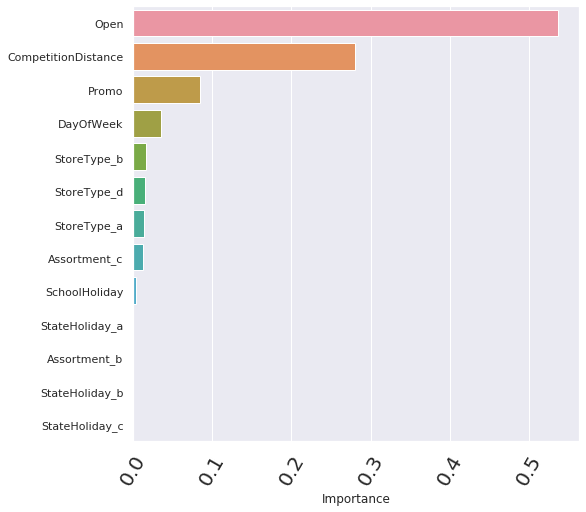

In [29]:
# PLot the feature importances
plt.figure(figsize=(8,8))
plt.xticks(rotation=60, fontsize = 20)
sns.barplot(y=importances_rfc_df.index, x=importances_rfc_df['Importance'])

In [30]:
# Import test.csv
test = pd.read_csv('test.csv')

In [31]:
# Show the info of test.csv
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
Id               41088 non-null int64
Store            41088 non-null int64
DayOfWeek        41088 non-null int64
Date             41088 non-null object
Open             41077 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null object
SchoolHoliday    41088 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [32]:
# Merge test and store
test = test.merge(store, on='Store')

In [33]:
# Check the head of the merged file
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [34]:
# Check of the merged file
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 17 columns):
Id                           41088 non-null int64
Store                        41088 non-null int64
DayOfWeek                    41088 non-null int64
Date                         41088 non-null object
Open                         41077 non-null float64
Promo                        41088 non-null int64
StateHoliday                 41088 non-null object
SchoolHoliday                41088 non-null int64
StoreType                    41088 non-null object
Assortment                   41088 non-null object
CompetitionDistance          40992 non-null float64
CompetitionOpenSinceMonth    25872 non-null float64
CompetitionOpenSinceYear     25872 non-null float64
Promo2                       41088 non-null int64
Promo2SinceWeek              23856 non-null float64
Promo2SinceYear              23856 non-null float64
PromoInterval                23856 non-null object
dtypes: float64(6), int6

In [35]:
# Print a summary of the merged dataframe
test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000,40992.000000,25872.000000,25872.000000,41088.000000,23856.000000,23856.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487,5088.583138,7.035250,2008.641929,0.580607,24.426559,2011.820926
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802,7225.487467,3.143015,6.862400,0.493466,14.161312,1.692166
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000,720.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000,2425.000000,7.000000,2010.000000,1.000000,22.000000,2012.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000,6480.000000,9.000000,2012.000000,1.000000,37.000000,2013.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,49.000000,2015.000000


In [36]:
# Fill the CompetitionDistance in the merged dataframe
test['CompetitionDistance'].fillna(0,inplace=True)

In [37]:
# Fill Open in the merged dataframe
test['Open'].fillna(0,inplace=True)

In [38]:
# Convert Assortment to categorical data in the merged file
test['Assortment'] = test['Assortment'].astype(pd.CategoricalDtype(assortment))

In [39]:
# Convert StateHoliday to categorical data in the merged file
test['StateHoliday'] = test['StateHoliday'].astype(pd.CategoricalDtype(categories=holidays))

In [40]:
# create a dataframe called test_df
# It should contain the merged test dataframe with dummy variables
test_df = pd.get_dummies(test,columns=cats,drop_first=True)

In [41]:
# Create test_X contain the test variables
test_X = test_df.drop(['Id','Store','Date','CompetitionOpenSinceMonth',
                  'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek',
                   'Promo2SinceYear','PromoInterval'],axis=1)


In [42]:
# Print the colums in the training set
X.columns

Index(['DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'StoreType_a',
       'StoreType_d', 'StoreType_b', 'Assortment_c', 'Assortment_b'],
      dtype='object')

In [43]:
# Print the columns in the # Print the colums in the training set
test_X.columns

Index(['DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_c', 'Assortment_b'],
      dtype='object')

In [44]:
# Create a variable called test_predictions
# It should contain the pedictions done on the test set
test_predictions = rf.predict(test_X)

In [45]:
# Print test_predictions
test_predictions

array([ 8003.57377473,  8225.99482123,  8683.54206589, ...,
       21397.2621112 ,     0.        ,  7576.32573896])

In [46]:
# Create a dataframe containing the test predictions
# Display its head
predictions_df = pd.DataFrame(test_predictions,columns=['Sales']) 
predictions_df.head()

,Sales
0,8003.573775
1,8225.994821
2,8683.542066
3,10450.933627
4,0.000000


In [47]:
# Add the Ids from the test set to the dataframe
# Show the head
predictions_df['Id'] = test['Id']
predictions_df.head()

,Sales,Id
0,8003.573775,1
1,8225.994821,857
2,8683.542066,1713
3,10450.933627,2569
4,0.000000,3425


Save the predictions as csv file called submission.csv. Upload the file to [Kaggle for scoring](https://www.kaggle.com/c/rossmann-store-sales/submissions).

In [48]:
predictions_df.to_csv('submission.csv',index=False)

The goal here wasn't to build a winning Kaggle model,the goal was to show you how to create a model and  upload it successfully to kaggle!

![submission Screenshot](submit.png)

**Note that the Random Forest Regression will not predict values outside the training set**

Happy Coding!